In [34]:
%pip install tensorflowjs

In [35]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/butterfly_photos/stages'
print(data_dir)

C:/Users/jerwin/Documents/butterfly_photos/stages


In [38]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 509 files belonging to 4 classes.


In [39]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'C:/Users/jerwin/Documents/GitHuby_photos/stages/')

Butterfly Folder has 829C:/Users/jerwin/Documents/GitHuby_photos/stages/
Eggs Folder has 95C:/Users/jerwin/Documents/GitHuby_photos/stages/
Larvae Folder has 441C:/Users/jerwin/Documents/GitHuby_photos/stages/
Pupae Folder has 967C:/Users/jerwin/Documents/GitHuby_photos/stages/


In [40]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/'
img_size = 180
batch = 32

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2332 files belonging to 4 classes.
Using 1866 files for training.
Found 2332 files belonging to 4 classes.
Using 466 files for validation.


In [42]:
stages = train_ds.class_names
stages

['Butterfly', 'Eggs', 'Larvae', 'Pupae']

In [43]:
import matplotlib.pyplot as plt

In [44]:
print(len(train_ds))
for element in train_ds.take(1):
    print(element)


59
(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[ 42.93445  ,  76.93445  ,  78.93445  ],
         [ 93.95222  , 129.75223  , 127.85222  ],
         [131.57222  , 158.57222  , 151.57222  ],
         ...,
         [ 48.227776 ,  38.227776 ,  37.227776 ],
         [ 49.431458 ,  38.431458 ,  34.431458 ],
         [122.36365  , 111.36365  , 107.36365  ]],

        [[ 22.206675 ,  64.20667  ,  62.973343 ],
         [ 24.98331  ,  69.98331  ,  66.98331  ],
         [108.48334  , 149.13333  , 143.01666  ],
         ...,
         [ 71.36667  ,  58.25     ,  52.6      ],
         [ 53.580044 ,  42.580044 ,  38.580044 ],
         [ 46.892254 ,  35.892254 ,  31.892252 ]],

        [[ 75.988884 , 117.988884 , 115.988884 ],
         [ 20.299967 ,  72.299965 ,  70.299965 ],
         [118.611115 , 161.11111  , 155.61111  ],
         ...,
         [ 62.72222  ,  49.333332 ,  44.5      ],
         [143.2627   , 132.2627   , 128.2627   ],
         [ 48.82829  ,  38.82829  ,  37.8

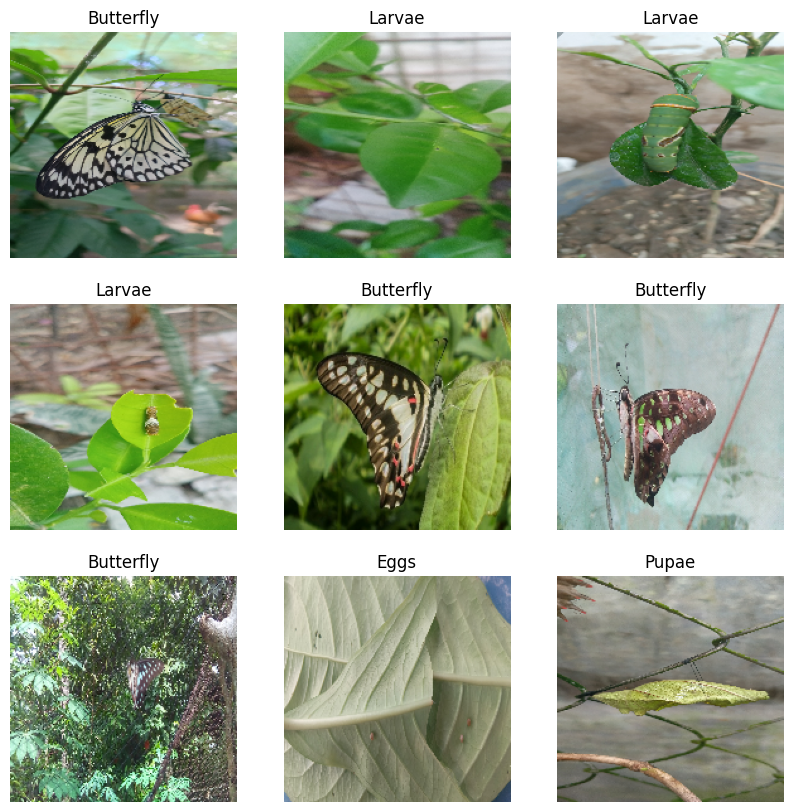

In [45]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(stages[labels[i]])
        plt.axis('off')

In [46]:
AUTOTUNE = tf.data.AUTOTUNE

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [48]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data AUgmentation

In [49]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

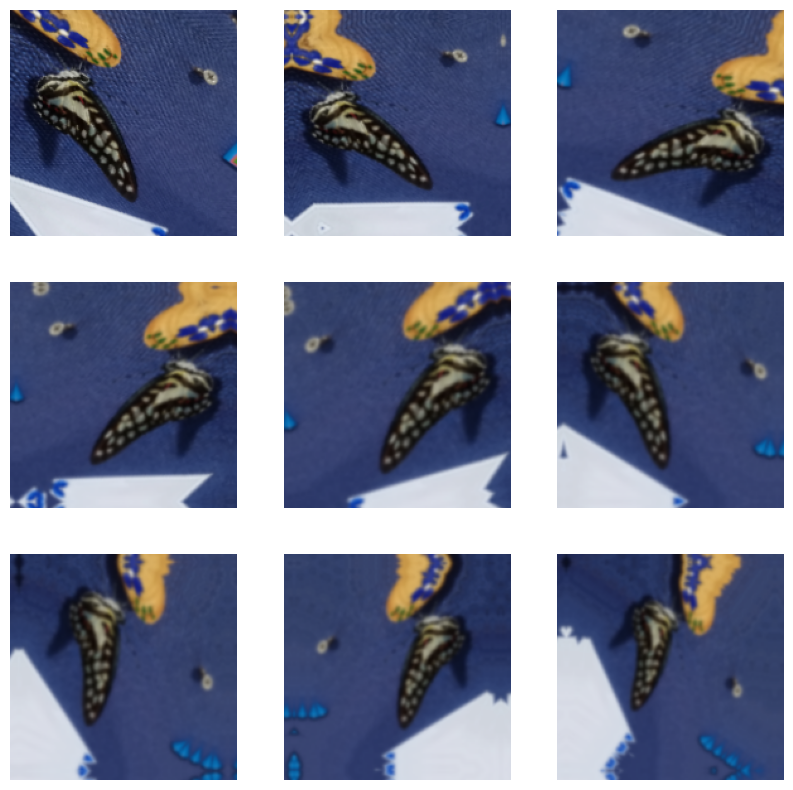

In [50]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [51]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [54]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
59/59 [==============================] - 16s 258ms/step - loss: 0.9360 - accuracy: 0.6115 - val_loss: 0.7900 - val_accuracy: 0.7339
Epoch 2/15
59/59 [==============================] - 10s 175ms/step - loss: 0.4914 - accuracy: 0.8344 - val_loss: 0.4956 - val_accuracy: 0.8562
Epoch 3/15
59/59 [==============================] - 9s 160ms/step - loss: 0.3883 - accuracy: 0.8800 - val_loss: 0.4620 - val_accuracy: 0.8863
Epoch 4/15
59/59 [==============================] - 10s 177ms/step - loss: 0.3268 - accuracy: 0.8998 - val_loss: 0.5272 - val_accuracy: 0.8691
Epoch 5/15
59/59 [==============================] - 10s 164ms/step - loss: 0.2863 - accuracy: 0.9137 - val_loss: 0.4420 - val_accuracy: 0.8884
Epoch 6/15
59/59 [==============================] - 10s 163ms/step - loss: 0.2557 - accuracy: 0.9223 - val_loss: 0.5754 - val_accuracy: 0.8734
Epoch 7/15
59/59 [==============================] - 9s 161ms/step - loss: 0.3002 - accuracy: 0.9073 - val_loss: 0.3076 - val_accuracy: 0.9313
E

In [55]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + stages[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [56]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/Pupae/PupaeCommonLime2.jpg')

1/1 [==============================] - 0s 459ms/step


'The Image belongs to Pupae with a score of 88.79730701446533'

In [57]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.keras')

In [58]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.h5')

In [59]:
model = load_model('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.h5')


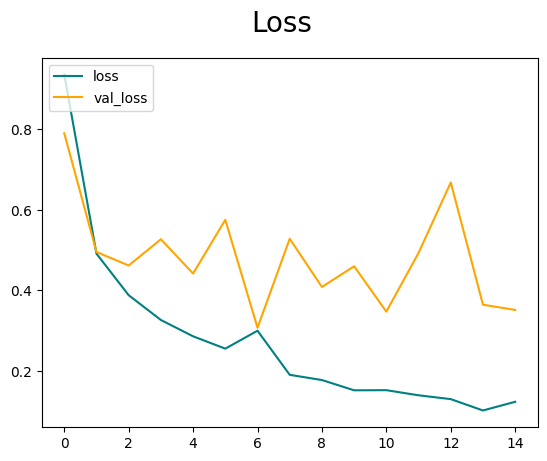

In [60]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

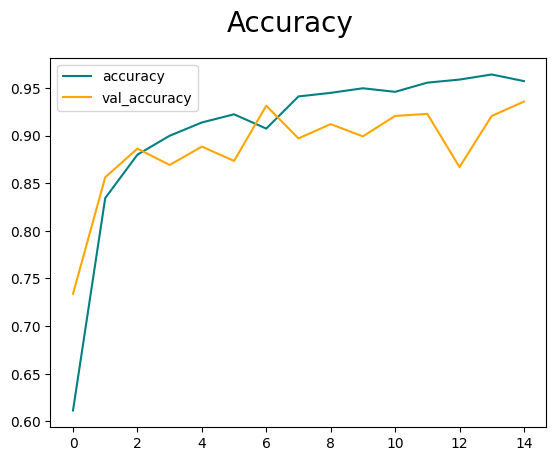

In [61]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [62]:
# Check the loaded model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [63]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Life_Stages.json", "w") as json_file:
    json_file.write(model_json)


In [64]:
from tensorflow.keras.models import load_model


In [65]:
model = load_model('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.h5')

In [66]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Life_Stages.json", "w") as json_file:
    json_file.write(model_json)
